# 数据科学入门1.4：多变量回归

## Introduction to Data Science Part1.4:  Multi variable Regression 

## 多变量回归

之前我们讲了一个independent variable的情况，那如果有多个x怎么办，
如下面的例子：

>exp3 这是一群人年收入，高中毕业以后受教育的年数，和信用卡账单，我们想通过前两个来预测他一年花多少钱。

| Annual   Income     x1 | # Years   Post-High School Education     x2 | Annual Credit   Card Charges     y |
|------------------------|---------------------------------------------|------------------------------------|
| $39,400                | 5                                           | $10,120.45                         |
| $68,200                | 4                                           | $15,289.80                         |
| $43,000                | 6                                           | $5,937.19                          |
| $53,600                | 2                                           | $0.00                              |
| $53,500                | 4                                           | $13,569.89                         |
| $60,800                | 2                                           | $3,889.79                          |
| $74,900                | 1                                           | $7,715.47                          |

我们还是老方法

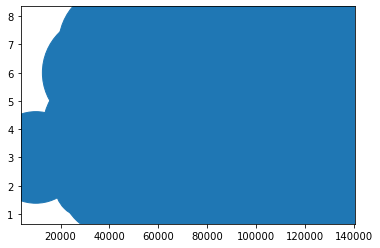

In [21]:
import pandas as pd
from matplotlib import pyplot as plt

# get a glimpse of data
df = pd.read_excel('exp3.xlsx')
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2])

一看wtf，三维的图不能这么画，那怎么办捏

可简单了（狗头

三行就搞定

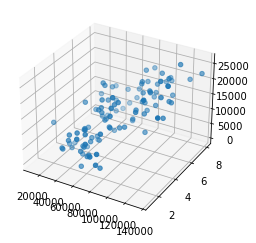

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')  # 把轴设置成3d的
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2])


首先我们还是把图画出来看看，这个叫做exploratory data analysis，
探索性数据分析，看看大概数据是啥样。可以看到除了散点图我还画了一个图
`pd.plotting.scatter_matrix(df)`，这个可以把表格里面所有变量画在一个散点图中，
如下面  ：

,Annual Income\nx1,# Years Post-High School Education\nx2,Annual Credit Card Charges\ny
Annual Income\nx1,1.000000,0.393945,0.703327
# Years Post-High School Education\nx2,0.393945,1.000000,0.470021
Annual Credit Card Charges\ny,0.703327,0.470021,1.000000


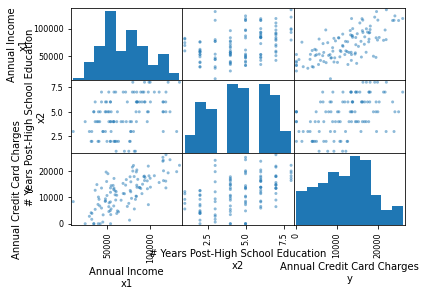

In [3]:
pd.plotting.scatter_matrix(df)
plt.plot()
df.corr()

这个图是对角线对称的，
大的xy就分别是变量，
对角线就是自身对自身没必要画散点图，
就给出了分布的直方图。
我们关心的是哪两个变量之间有关系。
可以看到x1，和y有比较明显的正相关，
你们希望看到的是independent variable和dependent variable之间有相关
而independent variable之间最好没有，这样说明每个变量都是独立有作用的。
如果independent variable之间强有相关则可以去掉某个变量。我们变量少可以不管，
当independent variable多的时候尽量选择和Y关联大的之间没关系的变量。
我们来看模型怎么搭：

In [15]:
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# 这里因为X是多个independent variable所以就不需要reshape了
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# 还是和上面一样，先把X给fit_transform()变成多项式
poly_reg = PolynomialFeatures(degree=2)
poly_X = poly_reg.fit_transform(X)
# 加截距
poly_X_int = sm.add_constant(poly_X)
# 建模型拟合
poly_model = sm.OLS(y, poly_X_int)
poly_res = poly_model.fit()

poly_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     24.26
Date:                Sun, 07 Apr 2024   Prob (F-statistic):           4.59e-16
Time:                        20:35:10   Log-Likelihood:                -1068.4
No. Observations:                 109   AIC:                             2149.
Df Residuals:                     103   BIC:                             2165.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4009.9485   4124.663     -0.972      0.333   -1.22e+04    4170.347
x1             0.1618      0.083      1.948      0.054      -0.003       0.327
x2          1500.0986   1144.428      1.311      0.193    -769.604    3769.801
x3          5.774e-08   5.96e-07      0.097      0.923   -1.12e-06    1.24e-06
x4            -0.0045      0.012     -0.391      0.697      -0.028       0.018
x5           -44.5318    132.013     -0.337      0.737    -306.348     217.284
==============================================================================
Omnibus:                        2.538   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.784
Skew:                           0.103   Prob(JB):                        0.410
Kurtosis:                       2.408   Cond. No.                     6.88e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# 还是和上面一样，先把X给fit_transform()变成多项式
poly_reg = PolynomialFeatures(degree=2)
poly_X = poly_reg.fit_transform(X)
poly_X_int = sm.add_constant(X)

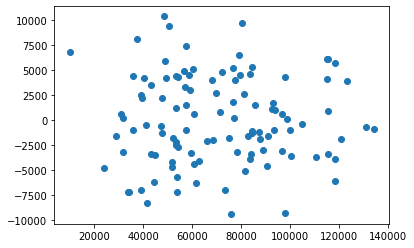

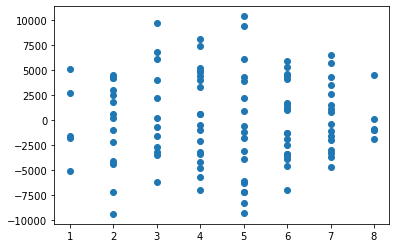

In [16]:
plt.scatter(X[:, 0], poly_res.resid)  #画残差（X0）
plt.show()
plt.scatter(X[:, 1], poly_res.resid)  # 画残差（X1）
plt.show()

## 更多变量回归

### Quiz:

>exp4 这个是年龄，血压，是否吸烟和未来10年发生中风的概率的关系，现在让你预测一个人是否未来会发生中风。

| Age x1 | Blood Pressure x2 | Smoker x3 | % Risk of Stroke   over Next 10 Years Y |
|--------|-------------------|-----------|-----------------------------------------|
| 63     | 129               | No        | 7                                       |
| 75     | 99                | No        | 15                                      |
| 80     | 121               | No        | 31                                      |
| 82     | 125               | No        | 17                                      |
| 60     | 134               | No        | 14                                      |
| 79     | 205               | Yes       | 48                                      |
| 79     | 120               | Yes       | 36                                      |


In [17]:
df = pd.read_excel('exp4.xlsx')
df.head()


,Age x1,Blood Pressure x2,Smoker x3,% Risk of Stroke over Next 10 Years Y
0,63,129,No,7
1,75,99,No,15
2,80,121,No,31
3,82,125,No,17
4,60,134,No,14


首先，我们要把表格里面的yes/no变成1/0，
这样才能用来计算，非常简单用`replace`函数，
传进去的参数分别是你要替换的值和替换后的值，
另外还有一个`inplace=True`表示替换变量中存储的值。
我们为了方便把yes/no替换成1/0，这样抽烟就是1，不抽是0。
这个是一个很基础的数据预处理，当然如果你的一个数据有很多种类型，
直接的用1，2，3...这种编码其实是不合适的，可以使用one hot编码，
这个大家自己去研究，下次课也会讲。


In [18]:
df.replace(to_replace=('Yes', 'No'), value=(1, 0), inplace=True)
df.head()


,Age x1,Blood Pressure x2,Smoker x3,% Risk of Stroke over Next 10 Years Y
0,63,129,0,7
1,75,99,0,15
2,80,121,0,31
3,82,125,0,17
4,60,134,0,14
